In [51]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [52]:
def json_to_numpy(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return np.array(list(data.values()))
    
def plot_pred_accuracy(file_list):

    crosswalk_250k_data = json_to_numpy(file_list[0])
    crosswalk_500K_data = json_to_numpy(file_list[1])
    crosswalk_750K_data = json_to_numpy(file_list[2])
    crosswalk_1m_data = json_to_numpy(file_list[3])

    fps = int(file_list[0].split('_')[2])
    cur_frame = fps
    sec = 1

    accuracy_250k = []
    accuracy_500k = []
    accuracy_750k = []
    accuracy_1m = []
    x = []

    while cur_frame < len(crosswalk_250k_data):
        accuracy_250k.append( crosswalk_250k_data[:cur_frame].mean() )
        accuracy_500k.append( crosswalk_500K_data[:cur_frame].mean() )
        accuracy_750k.append( crosswalk_750K_data[:cur_frame].mean() )
        accuracy_1m.append( crosswalk_1m_data[:cur_frame].mean() )

        x.append(sec)

        cur_frame += fps
        sec += 1

    plt.plot(x, accuracy_250k, 'bo-', label='250K')
    plt.plot(x, accuracy_500k, 'gh-', label='500K')
    plt.plot(x, accuracy_750k, 'rs-', label='750K')
    plt.plot(x, accuracy_1m, '>-', label='1m', color='orange')

    # Add labels and title
    plt.xlabel('Seconds')
    plt.ylabel('IoU')
    plt.title(f'Average Accuracy Over Time ({fps} fps)')

    # Add a legend
    plt.legend(title='Bitrate')

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()

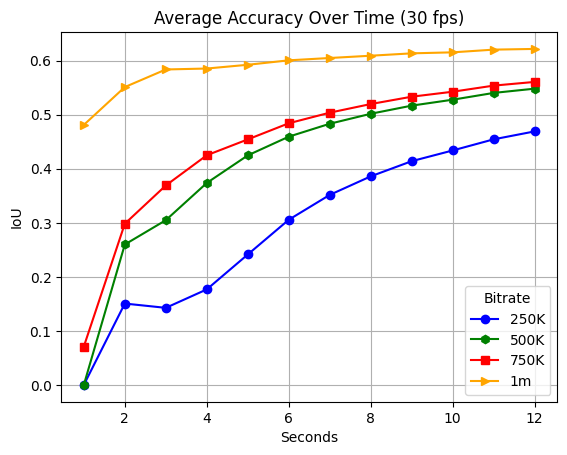

In [53]:
files = [
    'crosswalk_250K_30_iou.json',
    'crosswalk_500K_30_iou.json',
    'crosswalk_750K_30_iou.json',
    'crosswalk_1m_30_iou.json'
]
plot_pred_accuracy(files)

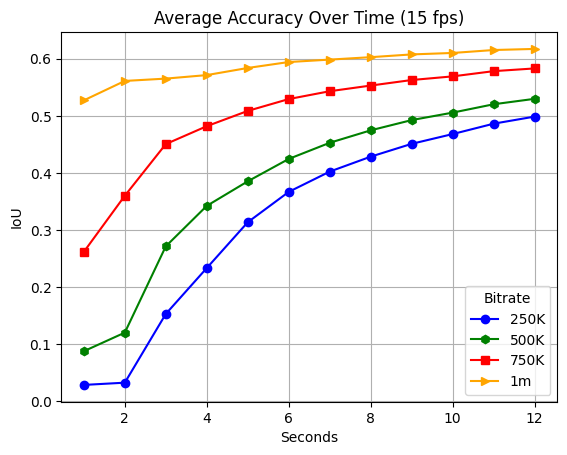

In [54]:
files = [
    'crosswalk_250K_15_iou.json',
    'crosswalk_500K_15_iou.json',
    'crosswalk_750K_15_iou.json',
    'crosswalk_1m_15_iou.json'
]
plot_pred_accuracy(files)

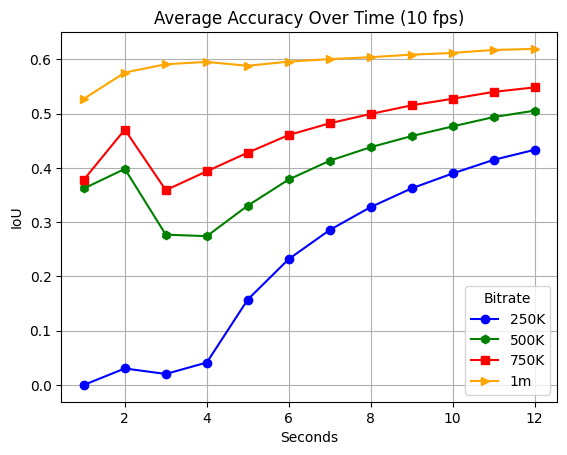

In [55]:
files = [
    'crosswalk_250K_10_iou.json',
    'crosswalk_500K_10_iou.json',
    'crosswalk_750K_10_iou.json',
    'crosswalk_1m_10_iou.json'
]
plot_pred_accuracy(files)